In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation





**#input variables(bank client data):**

**#age | int64 | age in years**

**#job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])
**
**#marital | object | marital status (categorical: ['married' 'single' 'divorced'])**

**#education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])**

**#default | Object | has credit in default? (categorical: ['no' 'yes'])**

**#balance | int64 | Balance of the individual**

**#housing | object | has housing loan? (categorical: ['yes' 'no'])**

**#loan | object | has personal loan? (categorical: ['no' 'yes'])**

**#contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])**

**#day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')**

**#month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])**

**#duration | int64 | last contact duration, in seconds (numeric)**

**#campaign | int64 | number of contacts performed during this campaign and for this client**

**#pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)**

**#previous | int64 | number of contacts performed before this campaign and for this client**

**#poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])****


**#Output variable (desired target):
#y-has the client subscribed a term deposit? (binary: 'yes','no')**

# Explore and Visualize the features

In [ ]:
df=pd.read_csv('bank.csv')

In [ ]:
#Shows top 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#shows no. of rows and columns
df.shape

(11162, 17)

In [ ]:
#shows datatype and null values present for all columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
#shows no.of unique values per column
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


## Data Preprocessing: Label Encoder

In [ ]:
#converts categorical columns to numeric format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['n_deposit']=le.fit_transform(df['deposit'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,n_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,0


In [ ]:
#deleted 2 columns from dataset 
df.drop(['deposit','pdays'],axis=1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,n_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,0


In [ ]:
#checks no. of values in deposit column(balanced data)
df.n_deposit.value_counts()

0    5873
1    5289
Name: n_deposit, dtype: int64

## Categorical Feature Distribution

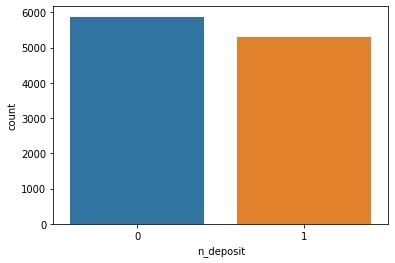

In [ ]:
#balanced output data
sns.countplot(x='n_deposit',data=df)


In [ ]:
#shows unique values for all columns
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']


**Client with job type as management records are high and housemaid are very less**

## Data Visualization

In [ ]:
# categorical columns 
cat_cols = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
       
print(cat_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


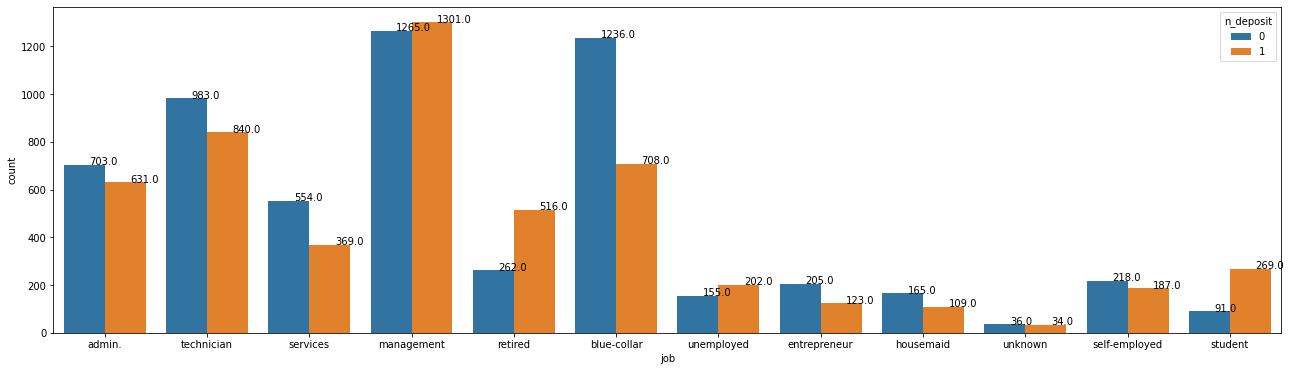

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


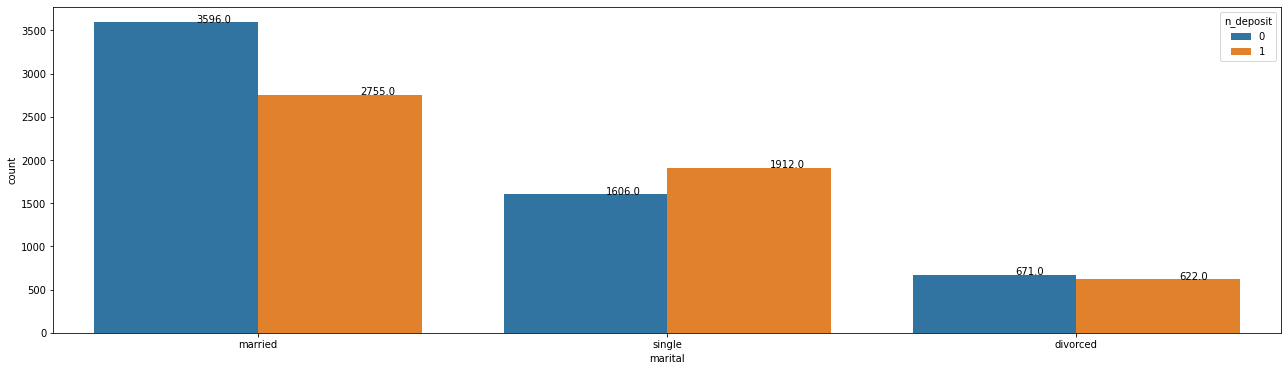

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


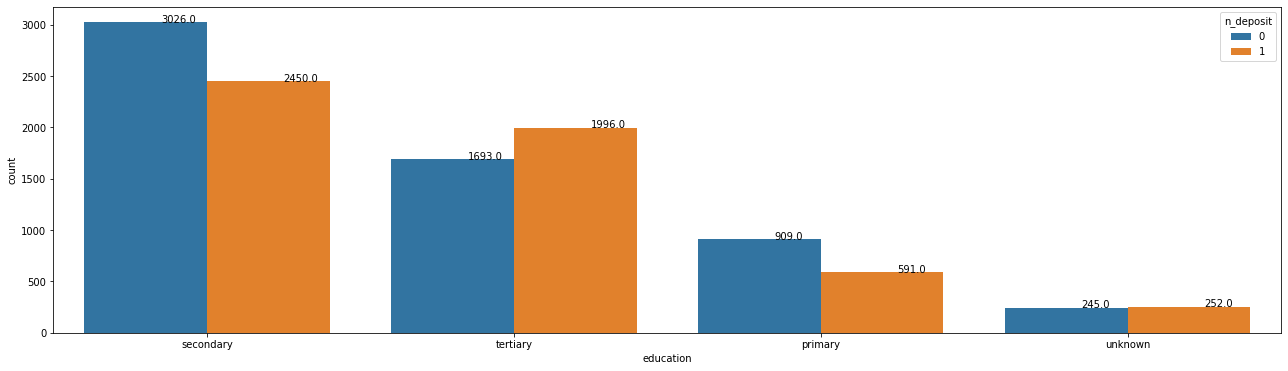

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


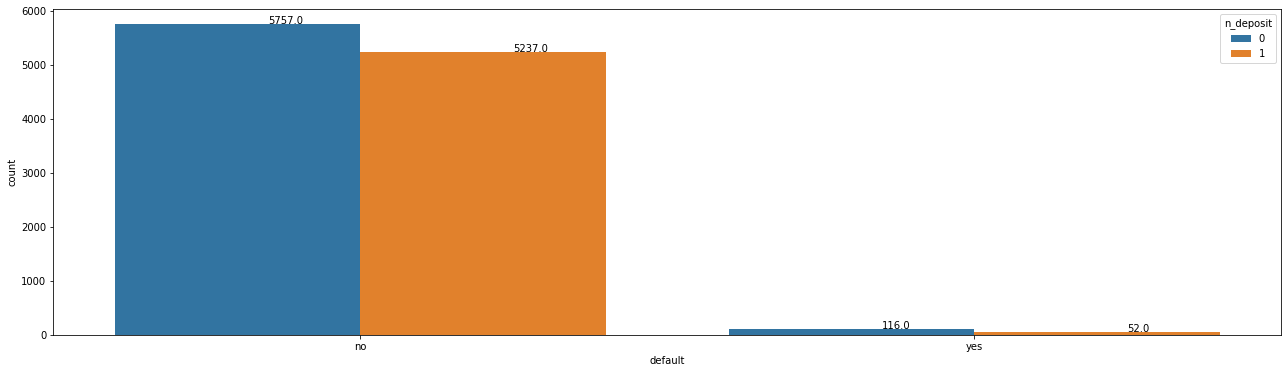

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


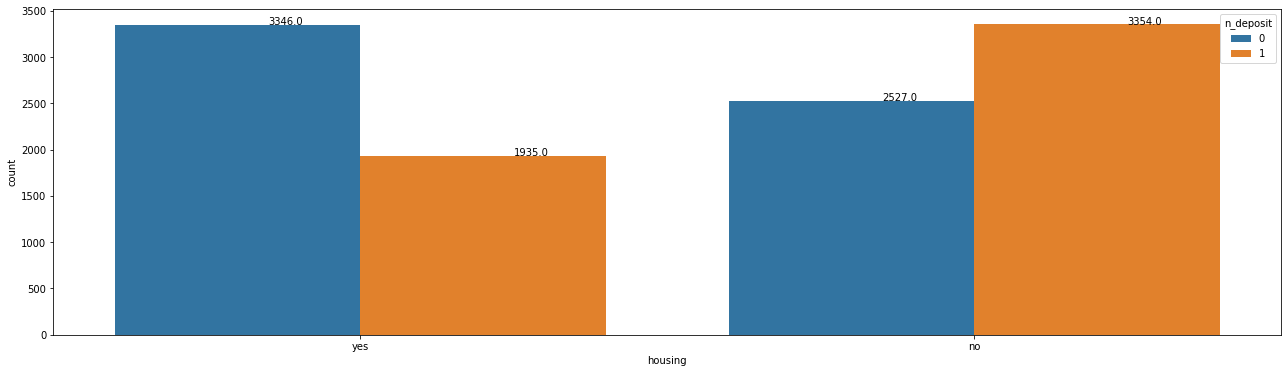

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


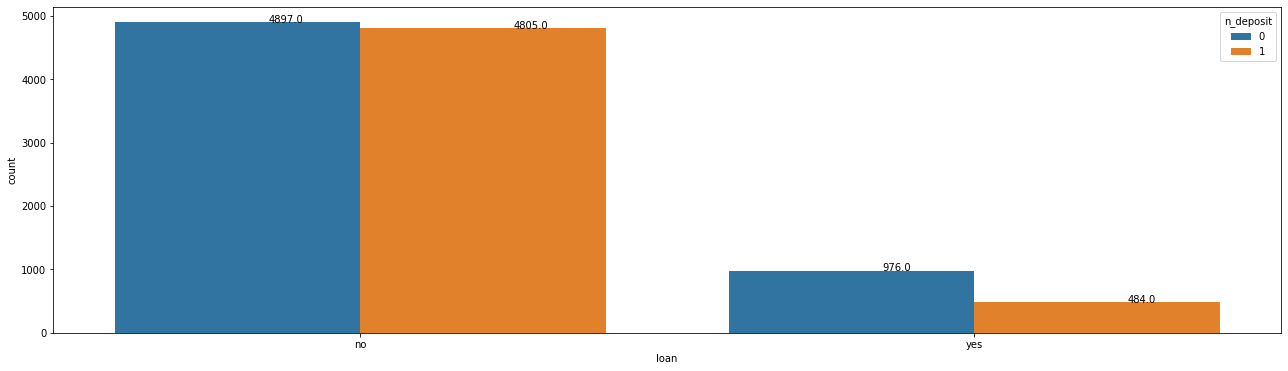

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


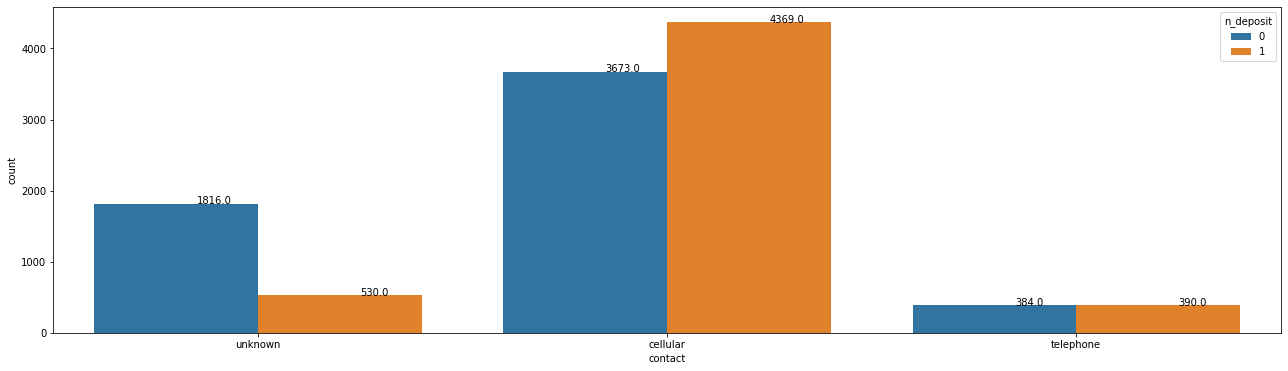

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


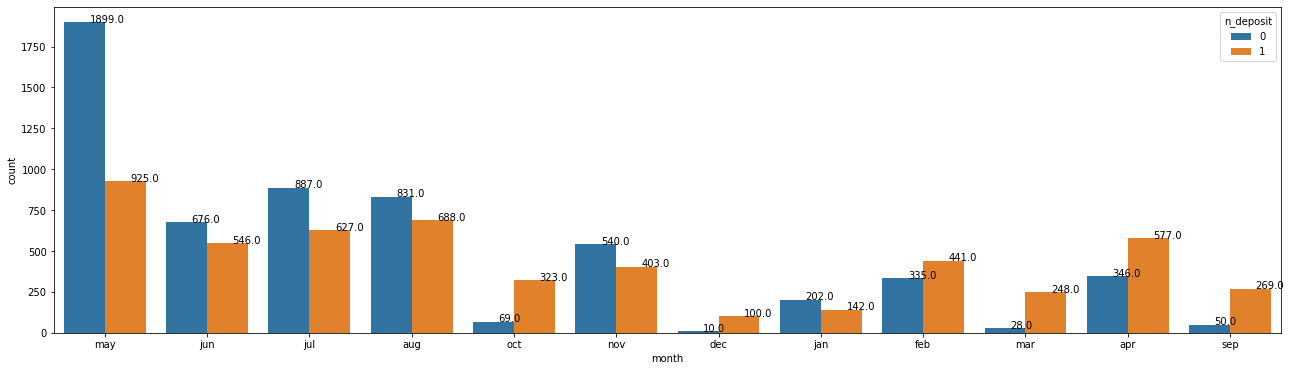

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


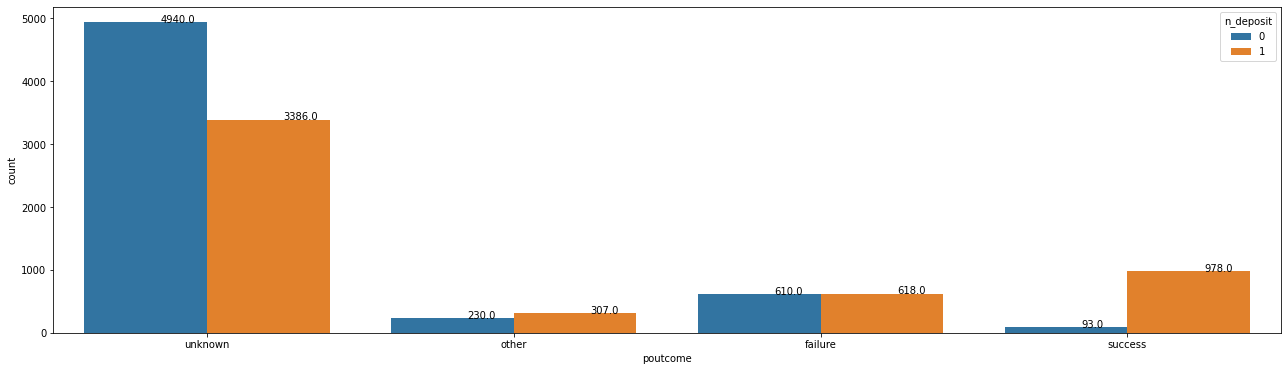

In [ ]:

def categorical_columns(cat_cols):
    for i in cat_cols:
        plt.figure(figsize=(22,6))
        ax = sns.countplot(df[i],hue=df['n_deposit'])
    
        for p in ax.patches:
           ax.annotate('{:.1f}'.format(p.get_height()), ( p.get_x()+0.25, p.get_height()+0.1))
    
        plt.show()
        
categorical_columns(cat_cols)

In [ ]:
#applying label encoder on categorical columns
df['n_job']=le.fit_transform(df['job'])
df['n_marital']=le.fit_transform(df['marital'])
df['n_education']=le.fit_transform(df['education'])
df['n_loan']=le.fit_transform(df['loan'])
df['n_contact']=le.fit_transform(df['contact'])
df['n_month']=le.fit_transform(df['month'])
df['n_poutcome']=le.fit_transform(df['poutcome'])
df['n_Deposit']=df['n_deposit']


In [ ]:
df.drop(['job','month','marital','education','default','housing','loan','contact','poutcome','n_deposit'],axis=1,inplace=True)
df.head()

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n_Deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1


In [ ]:
df.describe()

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n_Deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,0.832557,4.487905,1.199337,1.285164,0.130801,0.489697,5.445709,2.477782,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,2.292007,3.225132,0.625552,0.749478,0.337198,0.818724,3.191939,1.002952,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,1.000000,7.000000,2.000000,2.000000,0.000000,1.000000,8.000000,3.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,58.000000,11.000000,2.000000,3.000000,1.000000,2.000000,11.000000,3.000000,1.000000


In [ ]:
#shows all record whose deposit value is 0 
outcome_zero=df[df['n_Deposit'] == 0]

#shows all record whose deposit value is 1
outcome_one=df[df['n_Deposit'] == 1]

df.n_Deposit.value_counts()

0    5873
1    5289
Name: n_Deposit, dtype: int64

# Outlier Removal

In [ ]:
# function to remove outliers
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

In [ ]:
LR,UR=Outdet(outcome_zero.day)
print('days',LR,UR)
print('')
outcome_zero=outcome_zero[(outcome_zero['day']>LR) & (outcome_zero['day']< UR)]

LR,UR=Outdet(outcome_zero.age)
print('age',LR,UR)
print('')
outcome_zero=outcome_zero[(outcome_zero['age'] > LR)  &  (outcome_zero['age'] < UR)]
print('5873 rows-Before outlier removal from age')
print('5818 rows-After outlier removal from age')
print('')

LR,UR=Outdet(outcome_zero.balance)
print('balance',LR,UR)
print('')
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
print('5818 rows-Before outlier removal from balance')
print('5205 rows-After outlier removal from balance')
print('')

LR,UR=Outdet(outcome_zero.duration)
print('duration',LR,UR)
outcome_zero=outcome_zero[(outcome_zero['duration']>LR) & (outcome_zero['duration']< UR)]
print('5205 rows-Before outlier removal from duration')
print('4865 rows-After outlier removal from duration')
print('')

LR,UR=Outdet(outcome_zero.campaign)
print('campaign',LR,UR)
outcome_zero=outcome_zero[(outcome_zero['campaign']>LR) & (outcome_zero['campaign']< UR)]
print('4865 rows-Before outlier removal from campaign')
print('4339 rows-After outlier removal from campaign')
print('')





###########################################
LR,UR=Outdet(outcome_one.age)
print('age',LR,UR)
print('')
outcome_one=outcome_one[(outcome_one['age']>LR) & (outcome_one['age']< UR)]

LR,UR=Outdet(outcome_one.balance)
print('balance',LR,UR)
print('')
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]

LR,UR=Outdet(outcome_one.day)
print('day',LR,UR)
print('')
outcome_one=outcome_one[(outcome_one['day']>LR) & (outcome_one['day']< UR)]

LR,UR=Outdet(outcome_one.duration)
print('duration',LR,UR)
print('')
outcome_one=outcome_one[(outcome_one['duration']>LR) & (outcome_one['duration']< UR)]


LR,UR=Outdet(outcome_one.campaign)
print('campaign',LR,UR)
print('')
outcome_one=outcome_one[(outcome_one['campaign']>LR) & (outcome_one['campaign']< UR)]

LR,UR=Outdet(outcome_one.n_poutcome)
print('n_poutcome',LR,UR)
print('')
outcome_one=outcome_one[(outcome_one['n_poutcome']>LR) & (outcome_one['n_poutcome']< UR)]











days -10.5 41.5

age 10.5 70.5

5873 rows-Before outlier removal from age
5818 rows-After outlier removal from age

balance -1811.125 3183.875

5818 rows-Before outlier removal from balance
5205 rows-After outlier removal from balance

duration -183.0 553.0
5205 rows-Before outlier removal from duration
4865 rows-After outlier removal from duration

campaign -2.0 6.0
4865 rows-Before outlier removal from campaign
4339 rows-After outlier removal from campaign

age 2.5 78.5

balance -2712.25 5071.75

day -11.5 40.5

duration -478.0 1450.0

campaign -0.5 3.5

n_poutcome 0.5 4.5



In [ ]:
#return arrays after removing the outliers
df_1=pd.concat([outcome_zero,outcome_one],axis=0)
df_1

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n_Deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
#return number of zeros and ones 
df_1.n_Deposit.value_counts()

0    4339
1    3533
Name: n_Deposit, dtype: int64

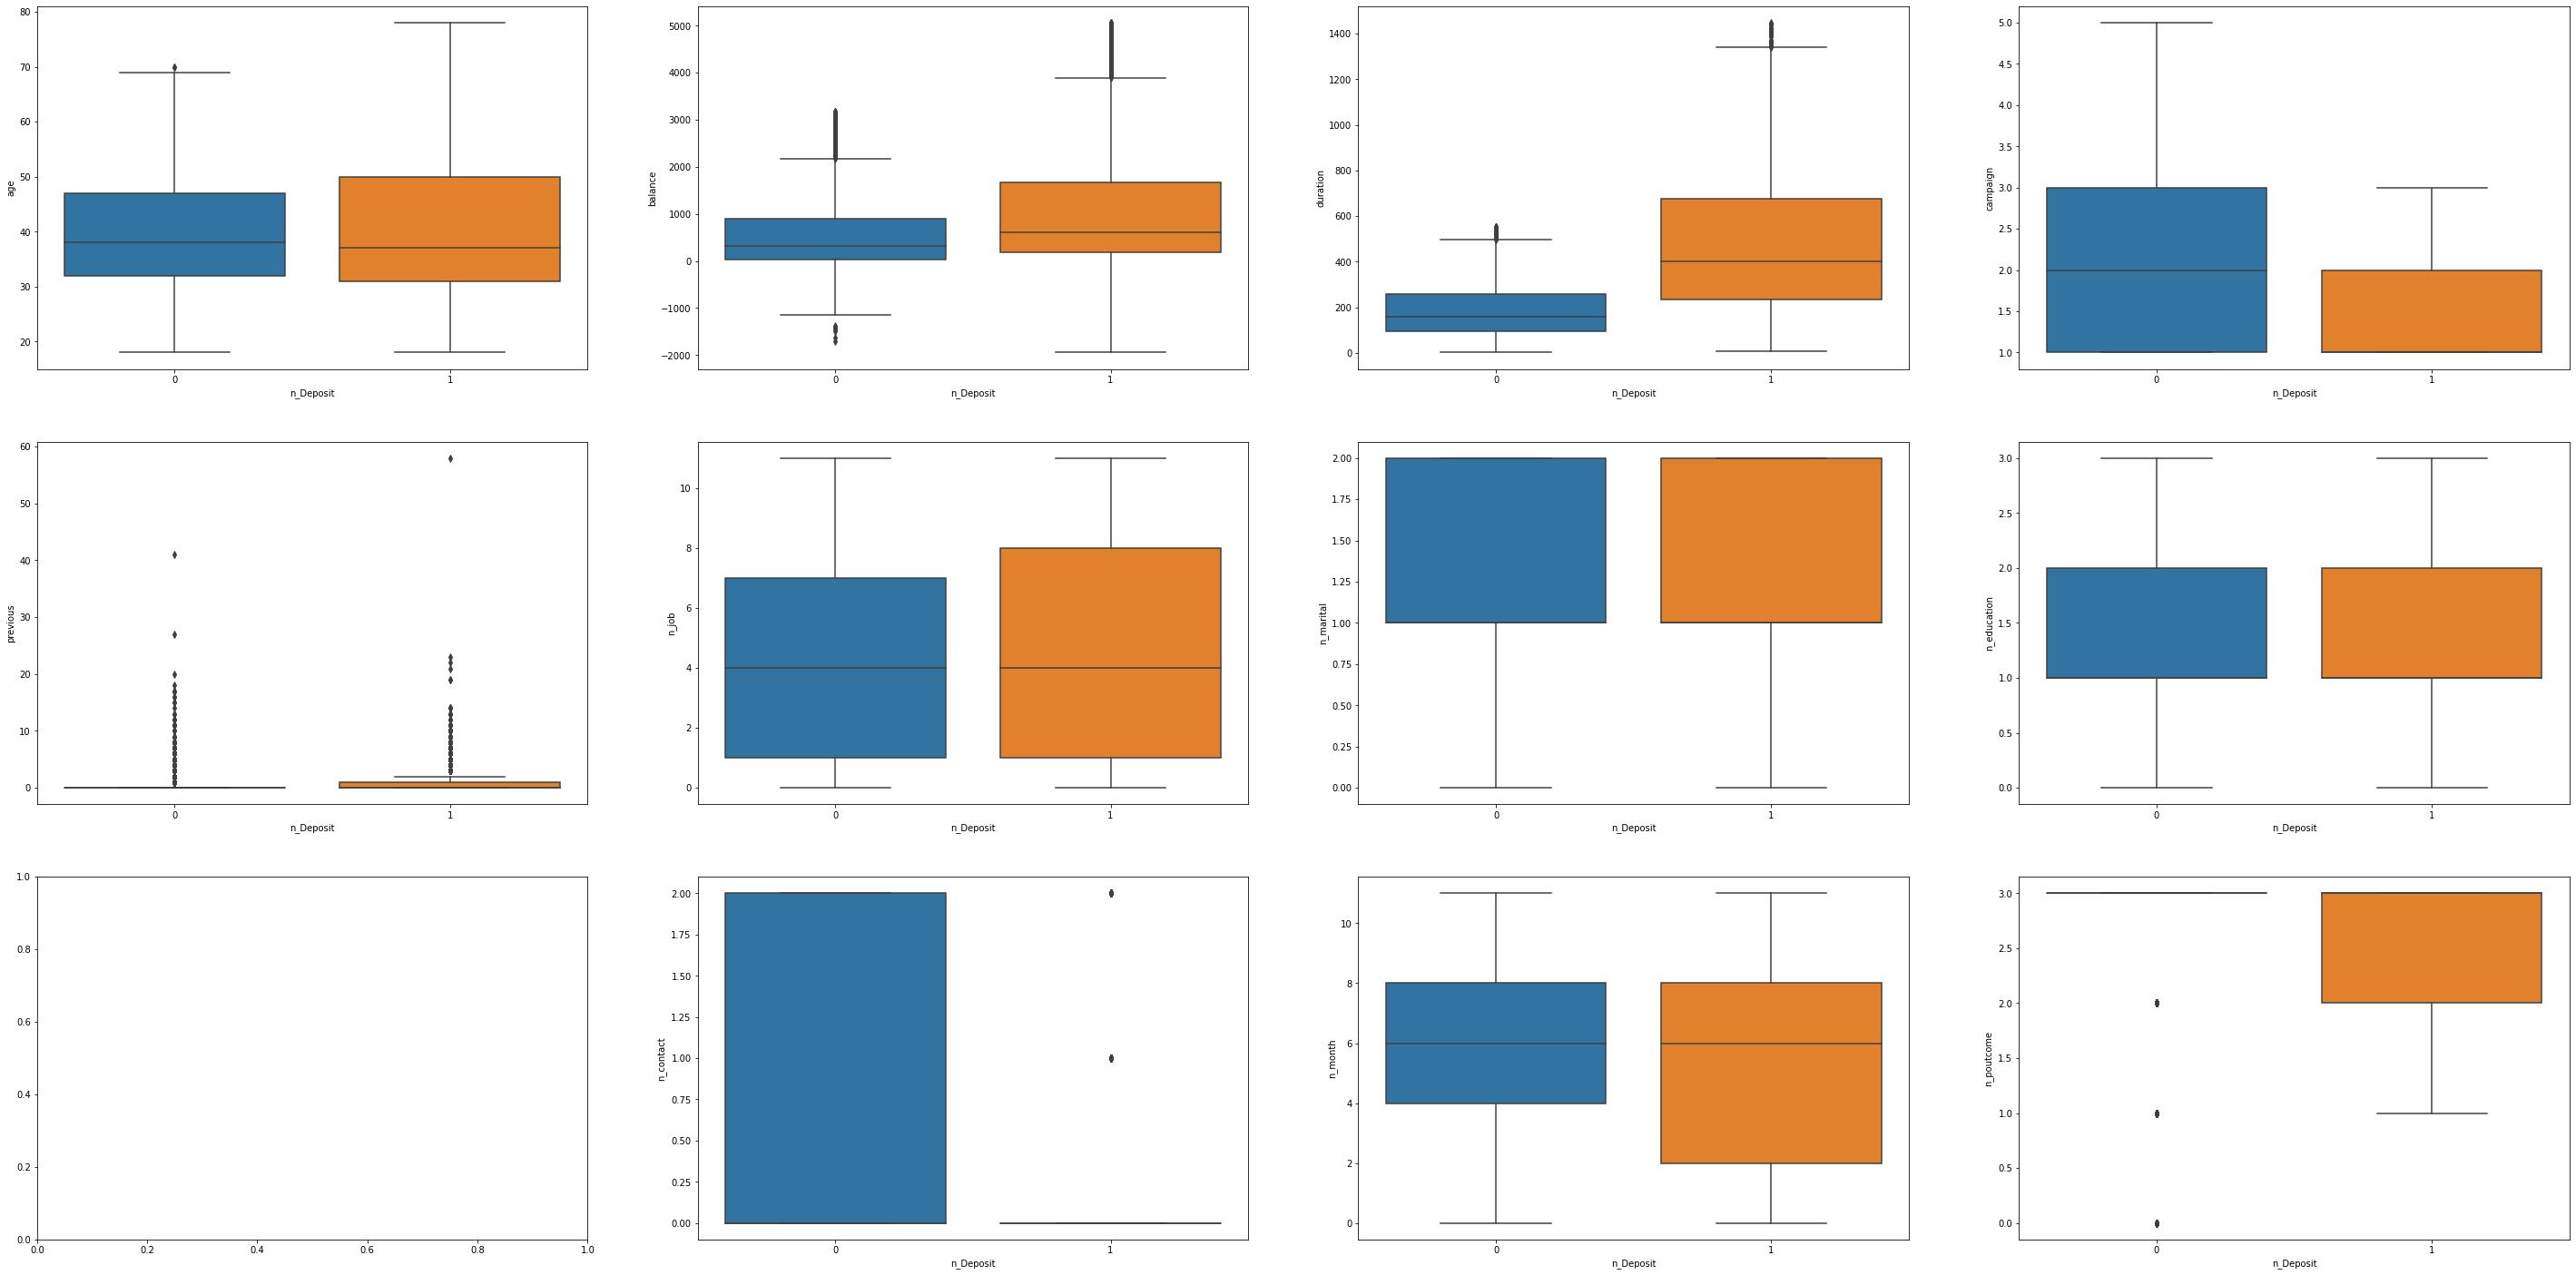

In [ ]:
figure, axis = plt.subplots(3, 4, figsize = (50,25))
sns.boxplot(x='n_Deposit',y='age',data=df_1,ax=axis[0,0])
sns.boxplot(x='n_Deposit',y='balance',data=df_1,ax=axis[0,1])
sns.boxplot(x='n_Deposit',y='duration',data=df_1,ax=axis[0,2])
sns.boxplot(x='n_Deposit',y='campaign',data=df_1,ax=axis[0,3])
sns.boxplot(x='n_Deposit',y='previous',data=df_1,ax=axis[1,0])
sns.boxplot(x='n_Deposit',y='n_job',data=df_1,ax=axis[1,1])
sns.boxplot(x='n_Deposit',y='n_marital',data=df_1,ax=axis[1,2])
sns.boxplot(x='n_Deposit',y='n_education',data=df_1,ax=axis[1,3])
sns.boxplot(x='n_Deposit',y='n_contact',data=df_1,ax=axis[2,1])
sns.boxplot(x='n_Deposit',y='n_month',data=df_1,ax=axis[2,2])
sns.boxplot(x='n_Deposit',y='n_poutcome',data=df_1,ax=axis[2,3])

# Correlation Matrix

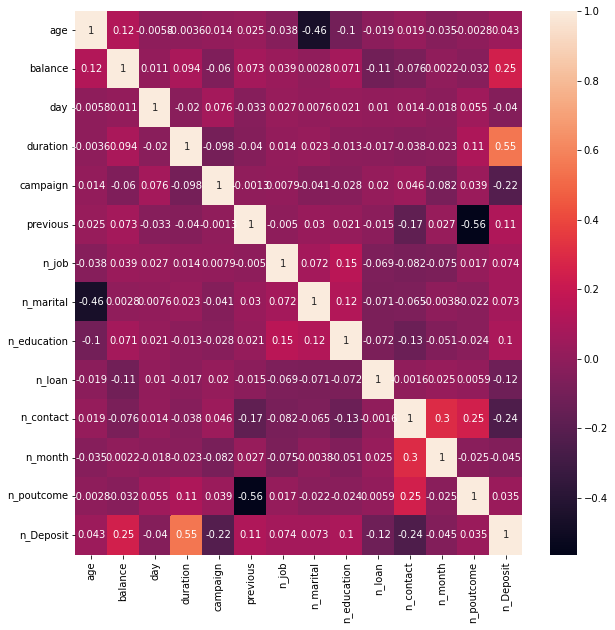

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_1.corr(),annot =True)

**Key features are
1)duration
2)balance
3)n_contact
4)campaign
5)n_loan
6)previous
7)n_education
**




In [ ]:
#drop the columns that has less importance from the correlation matrix
x=df_1.drop(['n_Deposit','age','day','n_job','n_marital','n_month','n_poutcome'],axis=1).values

y=df_1['n_Deposit'].values


df_1

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n_Deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
#splitting train 
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)

In [ ]:
# normalizing(scaling) the data
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
x_train_std_features=std_model.fit_transform(x_train)
x_test_std_features=std_model.transform(x_test)

print(x_train_std_features.shape)
print(' ')
print(x_test_std_features.shape)



(6297, 7)
 
(1575, 7)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

modelreg=LogisticRegression()
modelreg.fit(x_train_std_features,y_train)
ypred=modelreg.predict(x_test_std_features)


In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))
print("F1-Score:",metrics.f1_score(y_test, ypred))

Accuracy: 0.8044444444444444
Precision: 0.8041543026706232
Recall: 0.754874651810585
F1-Score: 0.7787356321839081


# KNeighborsClassifier


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train_std_features, y_train)
y_predicted_KNN = KNN_model.predict(x_test_std_features)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))
print("F1-Score:",metrics.f1_score(y_test, y_predicted_KNN))

Accuracy: 0.8076190476190476
Precision: 0.8002894356005789
Recall: 0.7701949860724234
F1-Score: 0.7849538679914834


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(x_train_std_features, y_train)
y_predicted_deseciontree = deseciontree_model.predict(x_test_std_features)


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))
print("F1-Score:",metrics.f1_score(y_test, y_predicted_deseciontree))

Accuracy: 0.7822222222222223
Precision: 0.764456981664316
Recall: 0.754874651810585
F1-Score: 0.759635599159075


# SVM 

In [ ]:
from sklearn.svm import SVC
SVM_model_linear=SVC(kernel='linear')
SVM_model_linear.fit(x_train_std_features,y_train)
y_predicted_SVM_linear = SVM_model_linear.predict(x_test_std_features)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_linear))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_linear))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_linear))
print("F1-Score:",metrics.f1_score(y_test, y_predicted_SVM_linear))

Accuracy: 0.8025396825396826
Precision: 0.8014814814814815
Recall: 0.7534818941504178
F1-Score: 0.7767408470926058


# Neural Network

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 14, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train_std_features, y_train, batch_size = 10, epochs = 100,verbose = 0)

y_pred = classifier.predict(x_test_std_features)
y_pred = (y_pred > 0.5)



print('Accuracy', metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('F1-Score:', metrics.f1_score(y_test,y_pred))

Accuracy 0.8165079365079365
Precision: 0.7926330150068213
Recall: 0.8091922005571031
F1-Score: 0.8008270158511371


# Final Report

In [ ]:
dfnew = pd.DataFrame()
dfnew['Names'] = ['LogisticRegression','KNeighborsClassifier','Decision Tree','SVM_Linear','Neuaral Network']
dfnew['Accuracy'] = [0.8215873015873015,0.8107936507936508,0.7822222222222223,0.8253968253968254,0.833015873015873]
dfnew['precision']=[0.8402555910543131,0.8075187969924812,0.764456981664316,0.8439490445859873,0.837386018237082]
dfnew['recall']=[0.743988684582744,0.7595473833097596,0.754874651810585,0.7496463932107497,0.7793493635077794]
dfnew['F1-Score']=[0.7891972993248313,0.7827988338192421,0.759635599159075,0.7940074906367042,0.8073260073260073]

dfnew


,Names,Accuracy,precision,recall,F1-Score
0,LogisticRegression,0.821587,0.840256,0.743989,0.789197
1,KNeighborsClassifier,0.810794,0.807519,0.759547,0.782799
2,Decision Tree,0.782222,0.764457,0.754875,0.759636
3,SVM_Linear,0.825397,0.843949,0.749646,0.794007
4,Neuaral Network,0.833016,0.837386,0.779349,0.807326
